In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv(r"C:\Users\orion\OneDrive\data.csv", sep=",")

In [16]:
data.head(4)

,metro,precio
0,5,375
1,15,487
2,20,450
3,25,500


In [19]:
data.columns

Index(['metro', 'precio'], dtype='object')

In [21]:
data[['metro','precio']].head()

,metro,precio
0,5,375
1,15,487
2,20,450
3,25,500


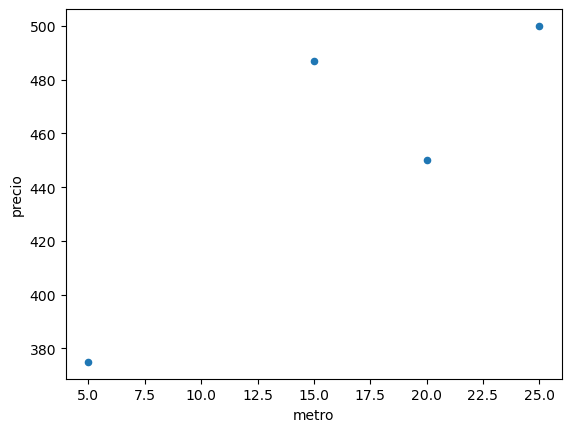

In [22]:
data.plot.scatter(x='metro',y='precio')
plt.show()

In [23]:
data['metro'].min()

5

In [65]:
w = 20
b = 0

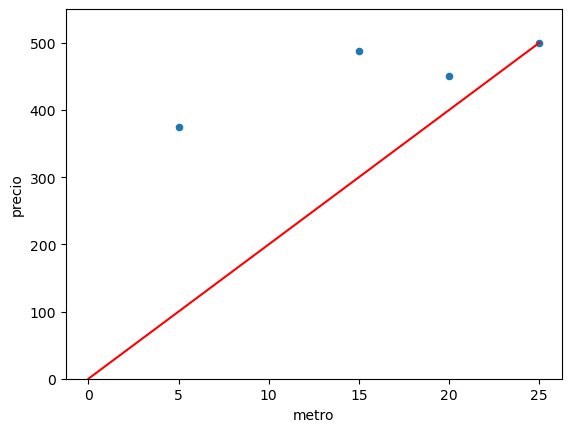

In [76]:
x = np.linspace(0,data['metro'].max(),100)
y = w*x+b

data.plot.scatter(x='metro',y='precio')
plt.plot(x, y, '-r')
plt.ylim(0,data['precio'].max()*1.1)

plt.show()

In [77]:
data['pred'] = data['metro']*w+b

In [78]:
data['diff'] = data['pred']-data['precio']
data['cuad'] = data['diff']**2
data.head()

,metro,precio,pred,diff,cuad
0,5,375,100,-275,75625
1,15,487,300,-187,34969
2,20,450,400,-50,2500
3,25,500,500,0,0


In [79]:
data['cuad'].mean()

28273.5

In [87]:
w = np.linspace(25,100,25)
grid_error = pd.DataFrame(w, columns=['w'])
grid_error.head()

,w
0,25.000
1,28.125
2,31.250
3,34.375
4,37.500


In [93]:
def sum_error(w, data):
    b=0
    data['pred'] = data['metro']*w+b
    data['diff'] = data['pred']-data['precio']
    data['cuad'] = data['diff']**2
    return(data['cuad'].mean())

In [94]:
grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, data=data))
grid_error.head()

,w,error
0,25.000,23292.250000
1,28.125,28272.230469
2,31.250,39477.796875
3,34.375,56908.949219
4,37.500,80565.687500


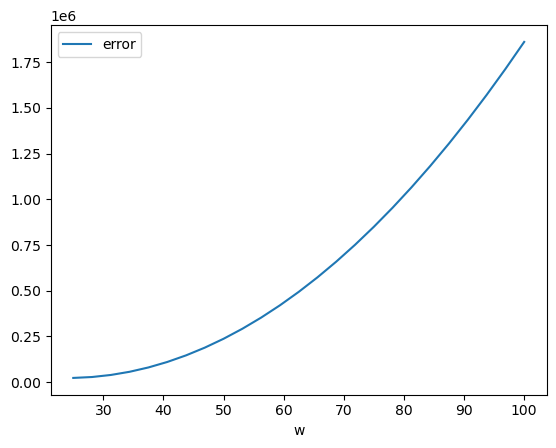

In [95]:
grid_error.plot(x='w',y='error')
plt.show()

In [96]:
from sklearn.linear_model import LinearRegression

X_data = np.array(data['metro']).reshape((-1, 1))
Y_data = np.array(data['precio'])

model = LinearRegression(fit_intercept=False)
model.fit(X_data, Y_data)

print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): 0.0
pendiente (w): [24.0627451]
